In [1]:
using DifferentialEquations
using ModelingToolkit
using LinearAlgebra
using Plots
using Colors
using Images
using Statistics
using Sundials

In [2]:
# Generate the constants
N = 100
Ax = Array(Tridiagonal([1.0 for i in 1:N-1],[-2.0 for i in 1:N],[1.0 for i in 1:N-1]))
Ax[1,end] = 1.0
Ax[end,1] = 1.0
Ax = Ax*100 # because scale of domain 

r0 = zeros(100,2)
r0[:,1] .= 0.2.*(rand.() .+1)
r0[:,2] .= 0.8.*(rand.() .+1)

# Dummy parameters used only locally in fxn but passed to specify scope, or something..
tAx = zeros(N)
dAx = zeros(N)
Dt = zeros(N)
Dd = zeros(N)
R1 = zeros(N)

100-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [3]:
function yeast_fast!(dr,r,h,p,t)
    Ka, Ki, Ki2, Kh, D1, D2, tAx, Dt, Dd, R1,tau = p
    hist = h(p, t - tau;idxs = 1)
    rhoT = @view r[:,1]
    rhoD = @view r[:,2]
    #rhoD .= mean(rhoD)
  
    dgtp = @view dr[:,1]
    dgdp = @view dr[:,2]
    mul!(tAx,Ax,rhoT)
    mul!(dAx,Ax,rhoD)
    @. Dt = D1*(tAx)
    @. Dd = D2*(dAx)
    @. R1 = Ka*(rhoT/(Kh+rhoT))*rhoT*rhoD - Ki*rhoT*hist - Ki2*rhoT
    # @. R1 = K1*rhoT^2*rhoD - K2*rhoT*pak1
    # Alternative nonlinear pos feedback
    @. dgtp = Dt + R1
    @. dgdp = Dd - R1
    end

yeast_fast! (generic function with 1 method)

In [4]:
tau=100
h(p, t; idxs = nothing) = typeof(idxs) <: Number ? 1.0 : ones(100,2)*.2
lags = [tau]
alg = MethodOfSteps(Tsit5())
p = (10,0,1,1,0.001, 1,tAx,Dt,Dd,R1,tau)
# p = (10,0.1,0.005,Ayt,tAx,Dt,R1)
# params for alt pos fb equation
yf = DDEProblem(yeast_fast!,r0, h, (0.0,1800),p,constant_lags = lags)
sol_yf = solve(yf,alg,saveat=10)

retcode: Success
Interpolation: 1st order linear
t: 181-element Vector{Float64}:
    0.0
   10.0
   20.0
   30.0
   40.0
   50.0
   60.0
   70.0
   80.0
   90.0
    ⋮
 1720.0
 1730.0
 1740.0
 1750.0
 1760.0
 1770.0
 1780.0
 1790.0
 1800.0
u: 181-element Vector{Matrix{Float64}}:
 [0.21486596171010353 1.0977684843514994; 0.31955470108181344 1.3176426861951558; … ; 0.25376208403410216 1.434832714165729; 0.2032055844832651 1.5925563643809464]
 [0.43840879848538666 0.13658963654434653; 3.5495908379334105 0.13346193153612235; … ; 0.0037479914607077163 0.13735242611126264; 0.03773218706078275 0.1371531288379373]
 [0.6199108033157148 0.1315457390528565; 4.3871048351741395 0.127734030753411; … ; 0.0044646627071200885 0.13250667639081304; 0.05398109083720878 0.13227825765806167]
 [0.6904392223993927 0.13131935059283156; 4.555444076470243 0.12760432584230355; … ; 0.005178429645947449 0.13177739911071518; 0.061568919481061836 0.13183295580818155]
 [0.6985837808673089 0.13134823775551685; 4.5376371

┌ Info: Saved animation to /tmp/jl_xgD2TadGZC.gif
└ @ Plots /home/dinosaur/.julia/packages/Plots/HyyIK/src/animation.jl:156
┌ Info: Saved animation to /home/dinosaur/Lab/Polarity/proj/Simulations/notebooks/yeast_fast_alt.gif
└ @ Plots /home/dinosaur/.julia/packages/Plots/HyyIK/src/animation.jl:156


Plots.AnimatedGif("/home/dinosaur/Lab/Polarity/proj/Simulations/notebooks/yeast_fast_alt.gif")
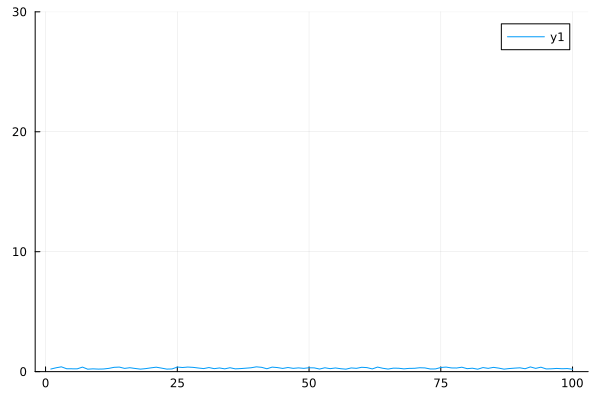

In [9]:
anim = @animate for i in 1:180
    Plots.plot(sol_yf[:,1,i],ylim=(0,30))
end
gif(anim, fps=60)
gif(anim, "yeast_fast_alt.gif", fps=60)

In [10]:
tau=60
h(p, t; idxs = nothing) = typeof(idxs) <: Number ? 1.0 : ones(100,3)*.2
lags = [tau]
alg = MethodOfSteps(Tsit5())
p = (10,1,0,1,0.001,1,tAx,Dt,Dd,R1,tau)
# p = (10,0.1,0.005,Ayt,tAx,Dt,R1)
# params for alt pos fb equation
yf = DDEProblem(yeast_fast!,r0, h, (0.0,1800),p,constant_lags = lags)
sol_neg = solve(yf,alg,saveat=10)

In [ ]:
anim = @animate for i in 1:180
    Plots.plot(sol_neg[:,1,i],ylim=(0,30))
end
gif(anim, fps=60)
#gif(anim, "yeast_fast_neg.gif", fps=60)